In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
test_dir = Path(r"C:\Users\mvand\Documents\Master EE\Year 4\Thesis\data\test_output")

pca_dir = test_dir / "PCA_analysis"
pca_files = [file for file in pca_dir.glob('*.csv') if not 'class' in file.stem]

In [3]:
## TO DO
## - add std bars to bar plots 
## - check confusion matrix value plots 

In [4]:
fn_bench = [file for file in pca_files if 'benchmark' in file.stem][0]

df_bench = pd.read_csv(fn_bench)
df_bench['hit_rate'] = df_bench['hit_ratio']

stat_cols = ['accuracy', 'precision', 'recall', 'f1', 'balanced_acc', 'hit_rate',
            'TP', 'TN', 'FP', 'FN', 'n', 'N']

df_bench.groupby(by='model')[stat_cols].mean()

,accuracy,precision,recall,f1,balanced_acc,hit_rate,TP,TN,FP,FN,n,N
model,,,,,,,,,,,,
CC,0.967016,0.712715,0.237572,0.356357,0.616872,0.237572,69.0,7238.2,27.8,221.4,7556.4,290.4
KGE,0.956854,0.316130,0.105377,0.158065,0.548132,0.105377,30.6,7199.8,66.2,259.8,7556.4,290.4
NSE,0.956961,0.320296,0.106765,0.160148,0.548854,0.106765,31.0,7200.2,65.8,259.4,7556.4,290.4
RMSE,0.956961,0.320296,0.106765,0.160148,0.548854,0.106765,31.0,7200.2,65.8,259.4,7556.4,290.4


In [5]:
set1_pca = [file for file in pca_files if 'set-1' in file.stem and 'PCA' in file.stem and not 'noPCA' in file.stem]
set2_pca = [file for file in pca_files if 'set-2' in file.stem and 'PCA' in file.stem and not 'noPCA' in file.stem]

set1_pca_bench = [file for file in pca_files if 'set-1' in file.stem and 'no' in file.stem]
set2_pca_bench = [file for file in pca_files if 'set-2' in file.stem and 'no' in file.stem]

In [94]:
## base 

def display_performance(benchmark_0, benchmark_1, list_performance_fn, grouper = 'model',
                        stat_cols=['accuracy', 'precision', 'recall', 'f1', 'balanced_acc'], performance_labels = [],
                       out_dir = None, fn_stem = None):
    
    ## benchmark
    sum_bench0 = benchmark_0.groupby(by=grouper)[stat_cols].mean()
    bench0_algs = sum_bench0.index.values

    ## benkchmark performance model
    sum_bench1 = benchmark_1.groupby(by=grouper)[stat_cols].mean() 
    eval_algs = sum_bench1.index.values 
    
    ## load list of df_performance 
    list_performance_df = []
    for fn in list_performance_fn:
        _df = pd.read_csv(fn)
        sum_df = _df.groupby(by=grouper)[stat_cols].mean()
        list_performance_df.append(sum_df)
    
        
    for col in stat_cols:
        
        fig = plt.figure(figsize=(16,3))
        x_plot = 0.
        
        x_tick_loc = []
        x_tick_label = []
        
        plt.title(col)
        
        for alg in bench0_algs:
            plt.bar(x_plot, sum_bench0.loc[alg,col], width=3, color='grey')
            
            x_tick_loc.append(x_plot)
            x_tick_label.append(alg)
            
            x_plot += 3.5
            
        x_plot += 2
        
        for alg in eval_algs:
            
            plt.bar(x_plot, sum_bench1.loc[alg,col], width=3, color='darkcyan')
            
#             if len(performance_labels) > 0:
#                 plt.text(x_plot-0.1, 0.1, performance_labels[0], rotation = 90, color = 'black', size=8)
            
            x_tick_loc.append( (x_plot+ 2*len(list_performance_df)) )
            x_tick_label.append(alg)
            x_plot += 3.5 
            
            for i, df_alg in enumerate(list_performance_df):
                plt.bar(x_plot, df_alg.loc[alg,col], width = 3, color='cadetblue')
                
                if len(performance_labels) > 0:
                    plt.text(x_plot-1, 0.1, performance_labels[i], color = 'black', size=8, rotation=90)
                
                x_plot += 3.5
            
            x_plot += 2 
    
#         plt.ylim(0,1)
        plt.xticks(x_tick_loc, x_tick_label, rotation = 40)
        plt.grid()
        plt.xlim(-2, x_plot-1)
        
        if out_dir != None:
            if fn_stem == None:
                fn = out_dir / 'plot_{}.png'.format(col)
            else:
                fn = out_dir / 'plot_{}_{}.png'.format(fn_stem, col)
            plt.savefig(fn)
    
    return 

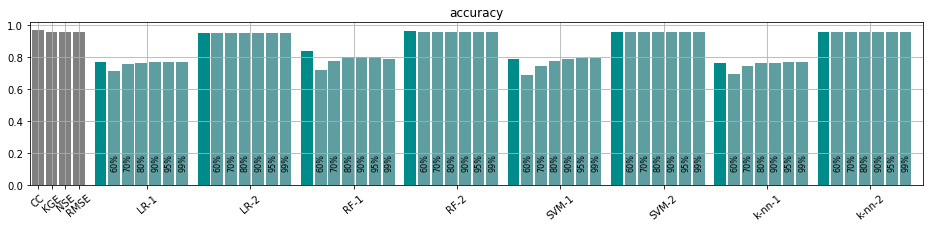

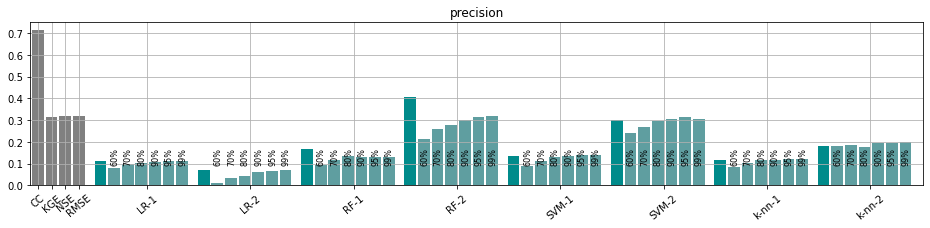

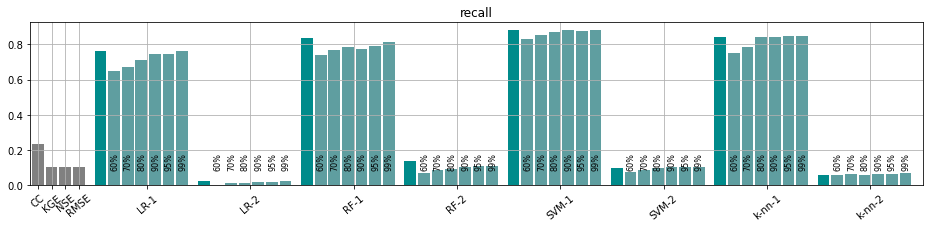

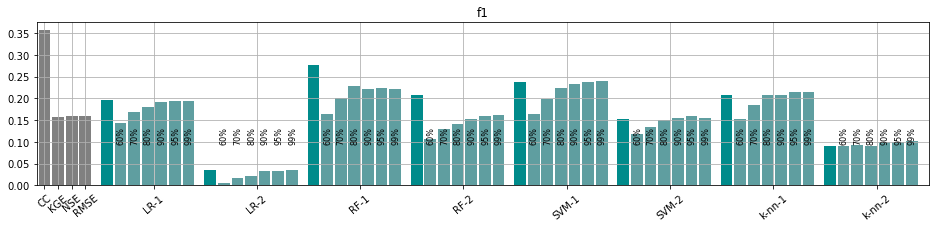

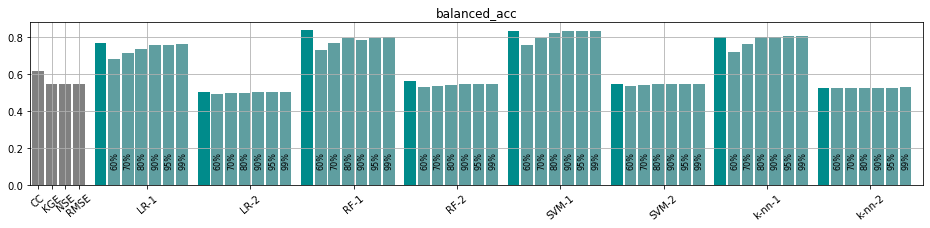

In [95]:
## set 1 
df_pca_bench1 = pd.read_csv(set1_pca_bench[0])
labels = ['60%', '70%', '80%', '90%', '95%', '99%' ]

display_performance( df_bench, df_pca_bench1, set1_pca, performance_labels = labels) #, 
#                     out_dir = pca_dir, fn_stem='set1' )

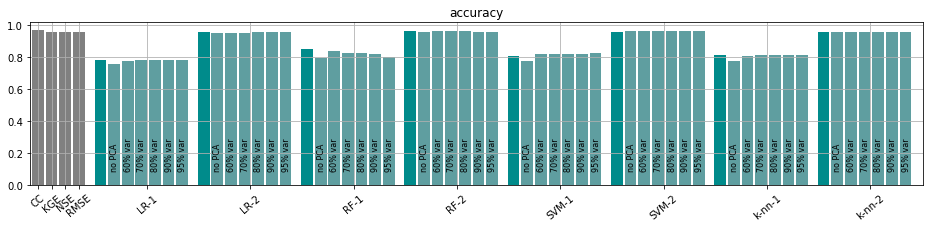

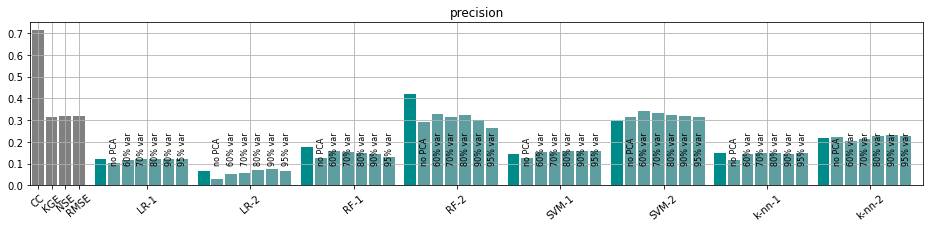

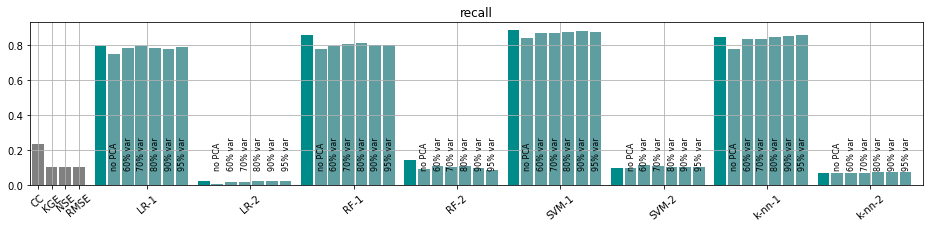

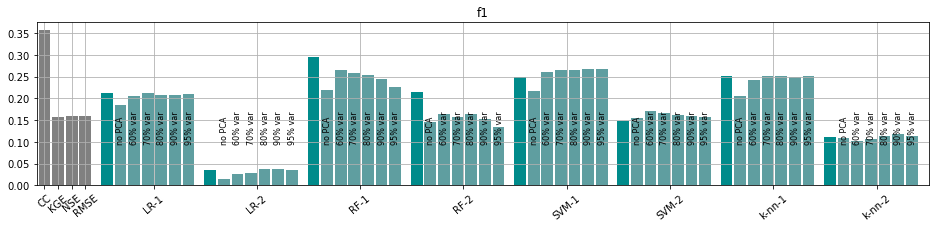

In [8]:
## set 2 
df_pca_bench2 = pd.read_csv(set2_pca_bench[0])
labels = ['no PCA', '60% var', '70% var', '80% var', '90% var', '95% var', '99% var' ]

display_performance( df_bench, df_pca_bench2, set2_pca, performance_labels = labels) #,
#                      out_dir = pca_dir, fn_stem='set2' )

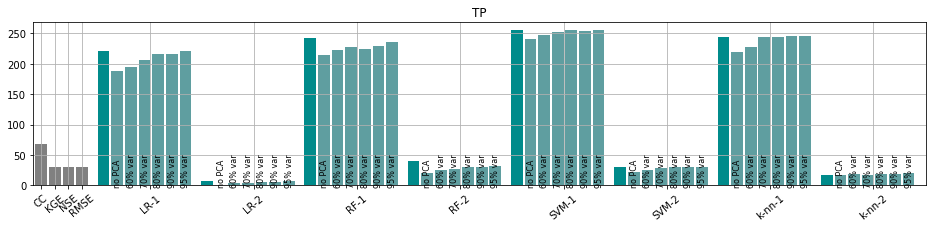

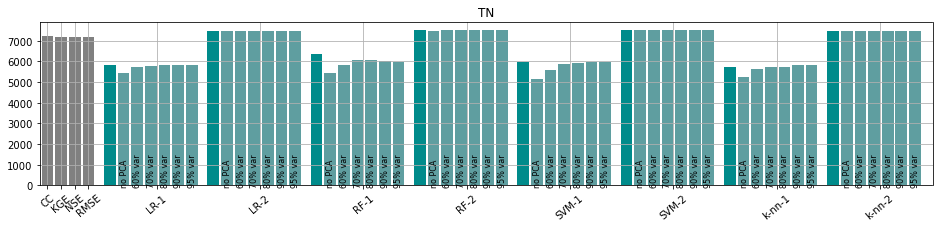

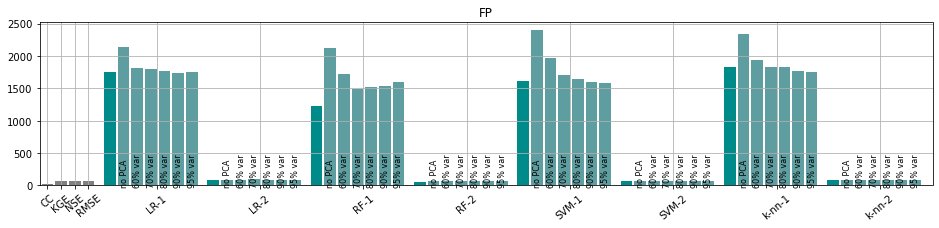

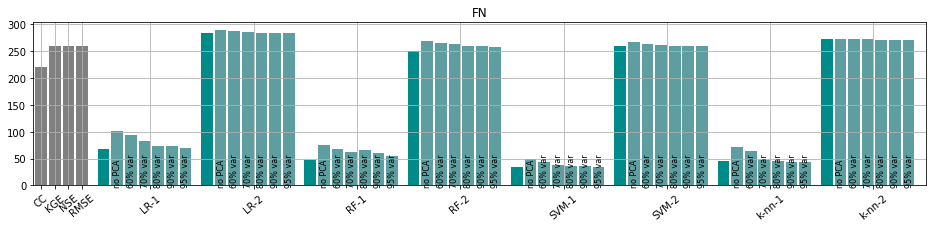

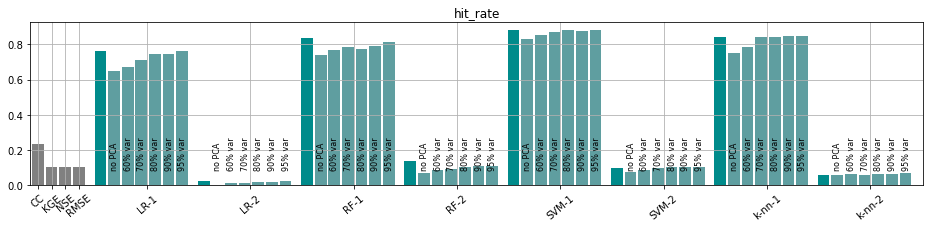

In [9]:
stat_cols = ['TP', 'TN', 'FP', 'FN', 'hit_rate']

display_performance( df_bench, df_pca_bench1, set1_pca, stat_cols = stat_cols, performance_labels = labels) #, 
#                     out_dir = pca_dir, fn_stem='set1' )


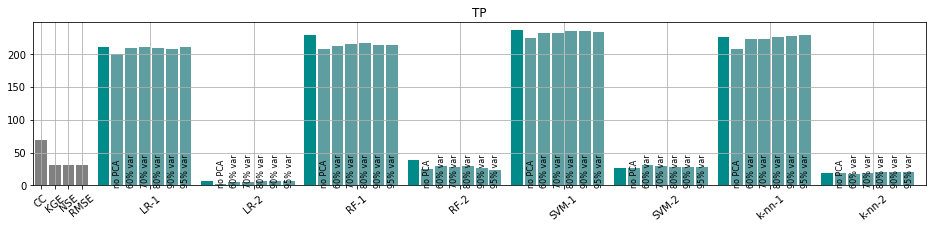

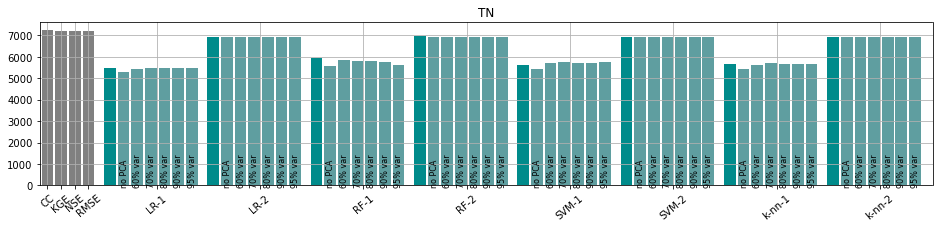

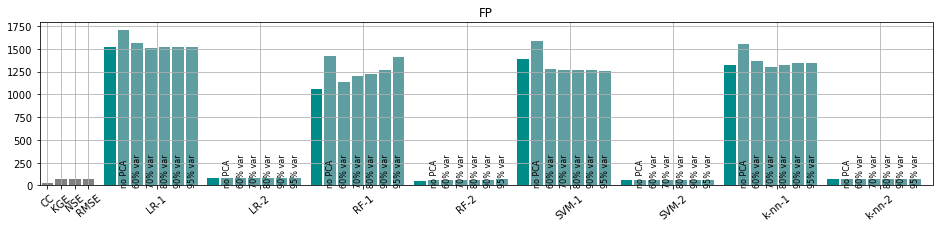

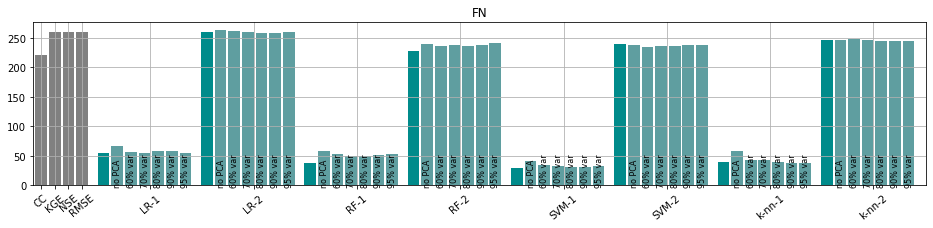

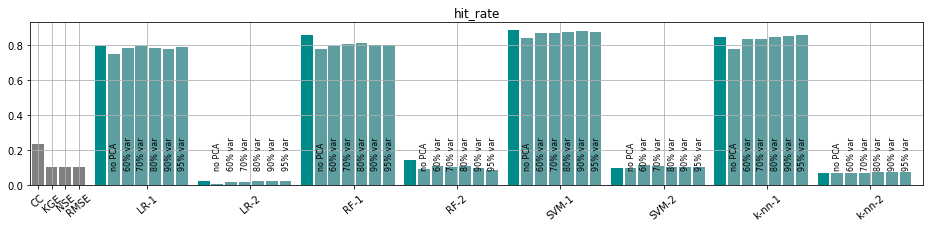

In [10]:
display_performance( df_bench, df_pca_bench2, set2_pca, stat_cols = stat_cols, performance_labels = labels) #, 
#                     out_dir = pca_dir, fn_stem='set2' )

In [13]:
## load classification results - analyse p0 and p1 for TP and FP

class_files = [file for file in pca_dir.glob('*.csv') if 'class' in file.stem]
set1_class = [file for file in class_files if 'set-1' in file.stem]
set2_class = [file for file in class_files if 'set-2' in file.stem]

In [91]:
def plot_confusion(df, range_col, target_col, model, title, save_dir = None,
                  label_1 = 'TP', label_2 = 'FP', id_col = 'tag'):
    
    ## TP 
    ## if prediction in one of range_col 
    if 'TP' in label_1:
        
        ix_TP = []
        
        for ix in df[id_col].unique(): 
            nTP = df[ (df[id_col] ==  ix) & (df[range_col] == 1) ]
            
            predit
            
            if df[ (df[id_col] ==ix) & (df[hat_col]==1.) ].index in nTP.index.values:
                
            
        
        
        ## TP 
        plot_1 = df[ (df[range_col] ==1) & (df[hat_col]==1) ]        
    
    if 'TP' in label_2:
        ## TP if prediction in one of range_col 
        plot_2 = df[ (df[range_col] ==1) & (df[hat_col]==1) ] 
    
    ## FP 
    ## if 0 in range col, but 1 for hat_col 
    if 'FP' in label_1:
        plot_1 = df[ (df[range_col] ==0) & (df[hat_col]==1) ] 
    
    if 'FP' in label_2:
        plot_2 = df[ (df[range_col] ==0) & (df[hat_col]==1) ] 
    
    ## TN 
    ## if 0 in range col and 0 for hat_col 
    if 'TN' in label_1:
        plot_1 = df[ (df[range_col] ==0) & (df[hat_col]==0) ] 
    
    if 'TN' in label_2:
        plot_2 = df[ (df[range_col] ==0) & (df[hat_col]==0) ] 
    
    ## FN 
    ## if 0 in range col and 0 for hat_col 
    if 'FN' in label_1:
        plot_1 = df[ (df[range_col] ==1) & (df[hat_col]==0) ] 
    
    if 'FN' in label_2:
        plot_2 = df[ (df[range_col] ==1) & (df[hat_col]==0) ] 

        
    ## plot
    fig, ax1 = plt.subplots()
    ax1.hist(plot_1[p1_col], color = 'b', label = label_1, bins = bin_edges )
    ax2 = ax1.twinx()
    ax2.hist(plot_2[p1_col], color = 'r', alpha=0.3, label = label_2, bins = bin_edges )
    
    ax1.tick_params(axis='y', labelcolor='b')
    ax2.tick_params(axis='y', labelcolor='r')
    
    ax1.set_xlim(0,1.05)
    ax1.set_xlabel('Class 1 probability')
    ax1.set_ylabel('n {}'.format(label_1), color='b')
    ax2.set_ylabel('n {}'.format(label_2), color='r')
    
    fig.legend()
    fig.suptitle(title)
    
    if save_dir != None:
        fn = save_dir / '{}_{}_{}.png'.format(title, label_1, label_2)
        print('Save: ', fn.stem)
        plt.savefig(fn)
        return fn 
    
    return 

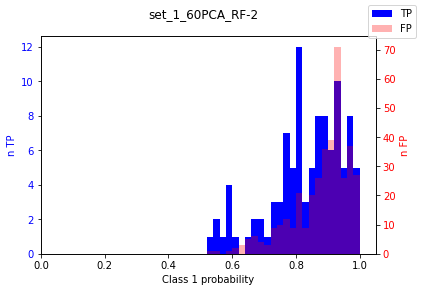

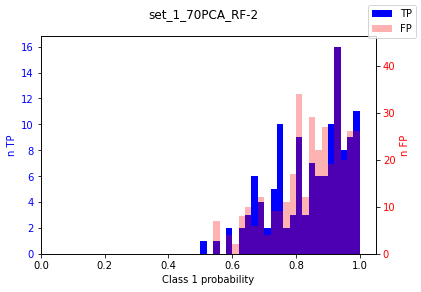

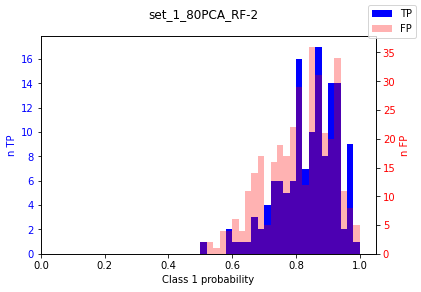

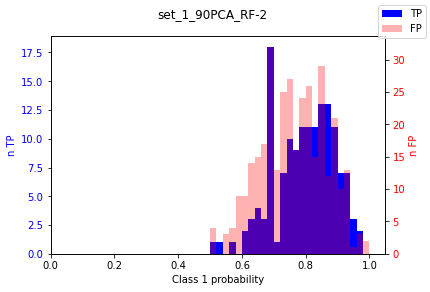

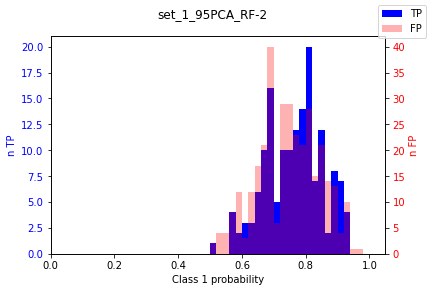

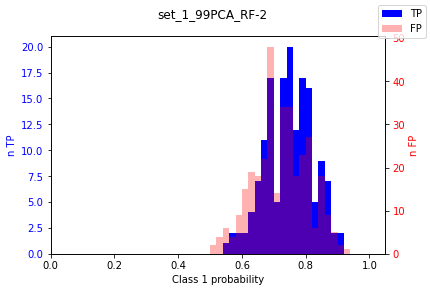

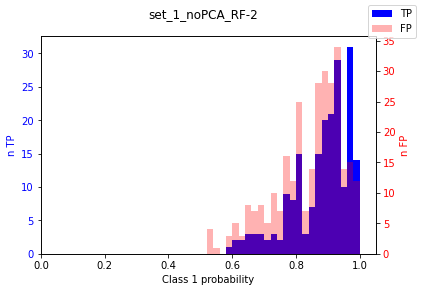

In [92]:
## SET -1 - TN and FP 
range_col = 'range_target'
target_col = 'target'

model = 'RF-2'
p0_col = '{}_p0'.format(model)
p1_col = '{}_p1'.format(model)
hat_col = '{}_target'.format(model)

bin_edges = np.arange(0,1.01, 0.02)

label_files = ['set_1_60PCA_{}'.format(model),
              'set_1_70PCA_{}'.format(model),
              'set_1_80PCA_{}'.format(model),
              'set_1_90PCA_{}'.format(model),
              'set_1_95PCA_{}'.format(model),
              'set_1_99PCA_{}'.format(model),
              'set_1_noPCA_{}'.format(model)]


for n, fn in enumerate(set1_class):
    
    df = pd.read_csv(fn, index_col=0)
    
    plot_confusion(df, range_col, target_col, model, label_files[n], save_dir = None,
                  label_1 = 'TP', label_2 = 'FP')


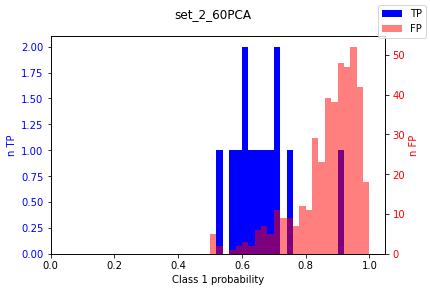

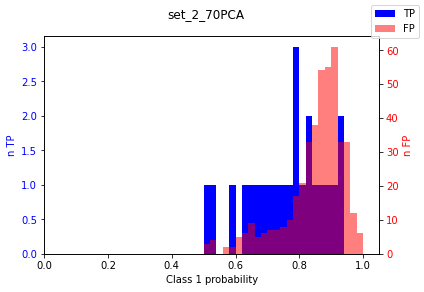

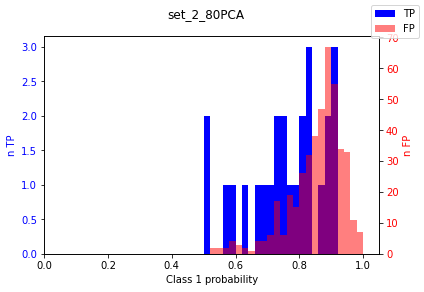

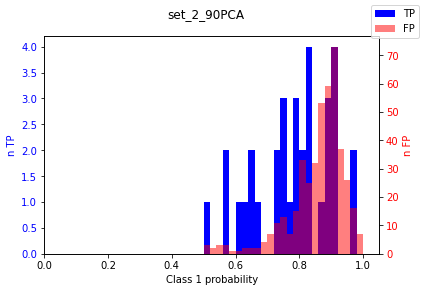

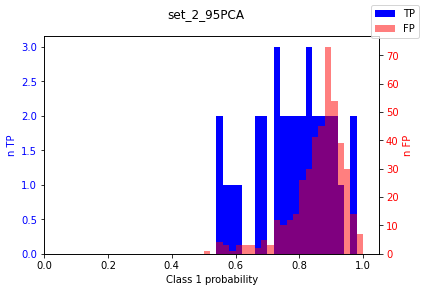

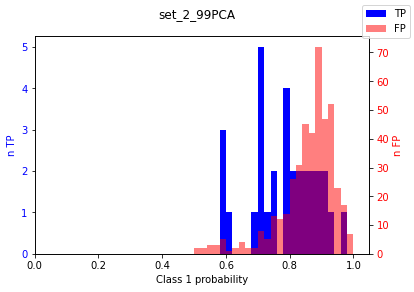

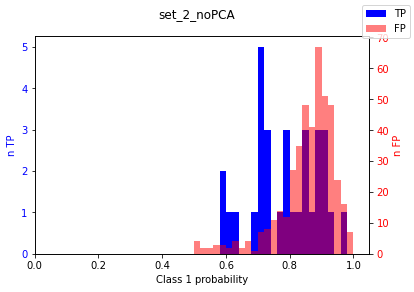

In [85]:
label_files = ['set_2_60PCA',
              'set_2_70PCA',
              'set_2_80PCA',
              'set_2_90PCA',
              'set_2_95PCA',
              'set_2_99PCA',
              'set_2_noPCA',]


for n, fn in enumerate(set2_class):
    
    df = pd.read_csv(fn, index_col=0)
    
    plot_confusion(df, range_col, target_col, model, label_files[n], save_dir = None,
                  label_1 = 'TP', label_2 = 'FP')
